In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
# thanks to Meena and Tyler for the ideas behind this notebook

In [4]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 12

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in many Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [5]:
# Warmup 1:  Requests and file writing

# use requests to get this file  "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = None

# check that the request was successful

# open a file called "iris.csv" for writing the data locally to avoid spamming their server
file_obj = None

# write the text of response to the file object

# close the file object

# look in your Jupyter Notebook parent tab to see the file

In [6]:
# Warmup 2:  Making a DataFrame

# read the "iris.csv" file into a Pandas dataframe
iris_df = None

# display the head of the data frame


In [7]:
# Warmup 3:  our CSV file has no column names....let's add some
# use this list: ["sep-len", "sep-wid", "pet-len", "pet-width", "class"]
# using the info from the web site: 
# Attribute Information:

# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: Iris Setosa, Iris Versicolour, Iris Virginica


iris_df = None


### Lecture 38:  Scatter and Line Plots
**Learning Objectives**
- 38.1 Use matplotlib to make a Scatter plot, including subplots

- 38.2 Use matplotlib to make a Line plot


### Making a Scatter Plot
<pre>
- typically from a list of dicts


In [8]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5


### Basic scatter plot
<pre>
x= , y= ,  color=
the name of the column selects the data and is used as the axis label

<AxesSubplot:xlabel='age', ylabel='height'>

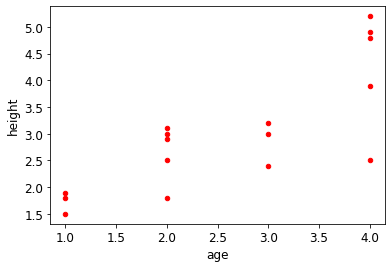

In [9]:
trees_df.plot.scatter(x="age", y="height", color = 'r')  # TODO: change y to diameter

In [10]:
# TODO: plot height vs diameter, with a different color
trees_df

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5
5,2,3.0,1.8
6,2,2.9,1.7
7,3,3.2,2.1
8,3,3.0,2.0
9,3,2.4,2.2


### Selecting a marker and a size 
<pre>
marker=' '       fun choices!
size as int (s=10)

In [13]:
# Documentation for markers         https://matplotlib.org/stable/api/markers_api.html 
#trees_df.plot.scatter(x="age", y="height", color="r",  marker = "D", s=50) # D for diamond

### The Size can be a data value
but you may want to multiply or divide its value so it looks good

In [14]:
#Option 1:
#trees_df.plot.scatter(x="age", y="height",  marker="H", s="diameter")

#Option 2:
#trees_df.plot.scatter(x="age", y="height", marker = "H", s=trees_df["diameter"] * 50) # this way allows you to make it bigger

### Let's take the Iris data and make a cool Scatter Plot

### How do we create a *scatter plot* for various *class types*?

In [15]:
iris_df

In [16]:
# make a set called classes that contains the unique values in the "class" column
classes = None     # set contains the unique values of the class column
classes

In [17]:
# TODO:  change this scatter plot so that the data is only for class ='Iris-setosa'
#iris_df.plot.scatter(x = "pet-width", y = "pet-len")

In [18]:
# write a for loop that iterates through each variety in classes:
colors = ["blue", "green", "red"]
for variety in classes:
    print(variety)
    sub_df = iris_df         # make a df just of just the data for this variety
    sub_df.plot.scatter(x = "pet-width", y = "pet-len", 
                        label=variety, 
                        color = colors.pop(0)) # sneaky way to iterate through colors

TypeError: 'NoneType' object is not iterable

In [19]:
# Did you notice that it made 3 plots ?!?!
# Let's try to put 3 plots together into a single plot!

### We can make Subplots in plots, called an AxesSubplot, keyword ax
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used

In [20]:
# complete this code to make 3 plots in one

plot_area = None   # look at this variable in line 12
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for variety in classes:
    sub_df = iris_df         # make a subset DataFrame
    print(variety, plot_area)
    plot_area = sub_df.plot.scatter(x="pet-width", y="pet-len",
                                    color=colors.pop(0),    
                                    label=variety,          
                                    ax=plot_area,           # first ax=None, then ax=the most recent plot
                                    marker=markers.pop(0))  # see colors.pop(0)

TypeError: 'NoneType' object is not iterable

## Line plots
- SERIES.plot.line()
- DATAFRAME.plot.line()
    - each column in data frame becomes a line in the plot

<AxesSubplot:>

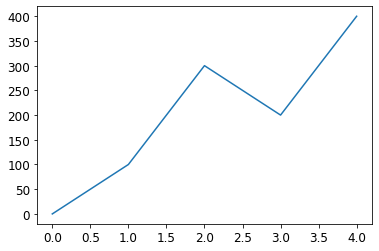

In [21]:
# when you make a series from a list, the default indices are the x axis
s = Series([0, 100, 300, 200, 400])
s.plot.line()

In [28]:
# you can make a series from a list and add on custom indices
# s = Series([0, 100, 300, 200, 400], index=[0, 1, 20, 21, 22])
# s.plot.line()
# s

In [29]:
# be careful!  if the indices are out of order you get a mess
# pandas plots each (index, value) in the order given
# s = Series([0, 100, 300, 200, 400], index=[0, 20, 21, 22, 1])
# s.plot.line()
# s

In [30]:
# you can fix this by calling sort_index()
# s.sort_index().plot.line()
# s.sort_index()

### Temperature dataset line plot

In [31]:
# this DataFrame is made using a dict of lists
temp_df = DataFrame( 
    { "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]     } 
)
temp_df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


### A Line Plot made from a DataFrame automatically plots all columns

In [32]:
# you can add labels, ticks, and ticklabels to a line plot

# ax = temp_df.plot.line()
# ax.set_xlabel("Month")
# ax.set_ylabel("Temp (Fahrenheit)")
# ax.set_xticks(range(12))   # makes a range from 0 to 11
# ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
 #                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


In [33]:
# TODO: make this look better....
# Option 1: use figsize to make the x-axis more spread out
# ax = temp_df.plot.line()
# ax.set_xlabel("Month")
# ax.set_ylabel("Temp (Fahrenheit)")
# ax.set_xticks(range(12))
# ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
#                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
None

In [35]:
# TODO: Option 2: rotate x-tick labels no figsize needed

# ax = temp_df.plot.line() 
# ax.set_xlabel("Month")
# ax.set_ylabel("Temp (Fahrenheit)")
# ax.set_xticks(range(12))
# ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
#                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], )
None

### Extra example....convert to Celcius and  add a horizontal line with values of 0
### Try this on your own after lecture


In [36]:
def fehr_to_celcius(f):
    return (5/9) * (f-32)

fehr_to_celcius(212)

100.0

In [37]:
temp_df.head()

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46


In [38]:
# call the function on the dataframe
celcius_df = fehr_to_celcius(temp_df)
celcius_df.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


In [39]:
# here is one way to add a horizontal line to our line plots
# 
celcius_df["freezing"] = 0
celcius_df

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


In [41]:
# this plots each column as lines
# ax = celcius_df.plot.line()
# ax.set_xlabel("Month")
# ax.set_ylabel("Temp (Celcius)")
# ax.set_xticks(range(12))
# ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
#                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
None

### Stock Market Example: Try this on your own after lecture

#### Download this file into your current directory:

https://github.com/tylerharter/caraza-harter-com/blob/master/tyler/meena/cs220/f20/materials/lectureDemo_code/lec-37/sp500.csv

Make sure it saves as sp500.csv

In [42]:
stock_df = pd.read_csv("sp500.csv")
stock_df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How much *current wealth (2018)* would we have given we had invested *1000$ in 1970*?

In [43]:
# add an extra column to this dataframe called "tot"
stock_df["tot"] = stock_df["return"].cumprod()  # cumulative product

# pretend that you start with $1000 in the year 1970
starting = 1000 

# add another column called "wealth" that represents total * starting
stock_df["wealth"] = stock_df["tot"] * starting

# what is in the last 5 rows of your dataframe?
stock_df.tail()

,year,return,tot,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


In [45]:
# change the index of the dataframe to be the year
# stock_df = stock_df.set_index("year")
# stock_df.head()

# if you try to run this cell again, you will get an error 

In [46]:
# plot line of "wealth"
# ax = ???
# ax.set_ylabel("Wealth ($)")
# ax.set_title("Value of $1000 invested in the S&P 500 in 1970")